# Glass classification

### Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import math
from scipy import stats

### Get Data

In [2]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
glass = pd.read_csv(target_url, header = None, prefix = "V")
glass.columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]

### First look at the data

In [3]:
summary = glass.describe()
print(glass.head())
print(summary)

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
               Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516523   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000  

### Quartiles boxplot

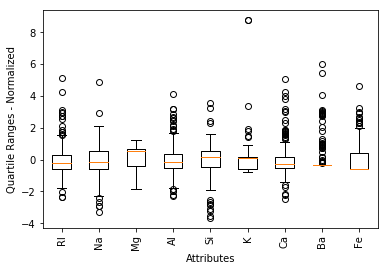

In [4]:
glassNormalized = glass.copy()
ncols = len(glassNormalized.columns)

for i in range(ncols - 1):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    
    glassNormalized.iloc[:, i:(i + 1)] = (glassNormalized.iloc[:, i:(i + 1)] - mean) /sd
    
array = glassNormalized.values[:, 1:-1] # leave out categorial column "Type" and column "Id"
plot.boxplot(array)
plot.xticks(list(range(1, len(summary.columns) - 1)), list(summary.columns[1:]), rotation = 'vertical')
plot.xlabel("Attributes")
plot.ylabel("Quartile Ranges - Normalized")
plot.show()

### Propability plots

Column 1:


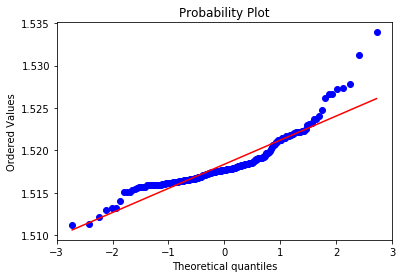

Column 2:


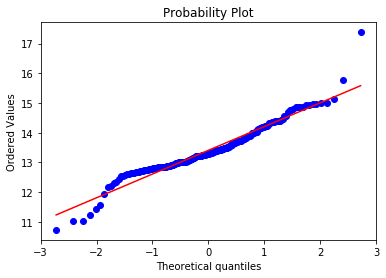

Column 3:


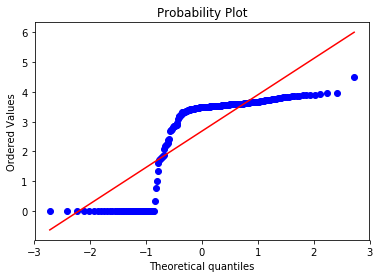

Column 4:


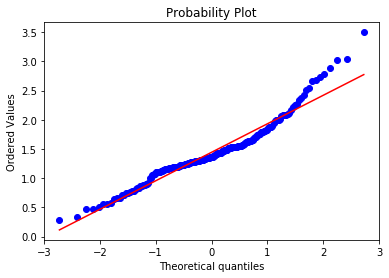

Column 5:


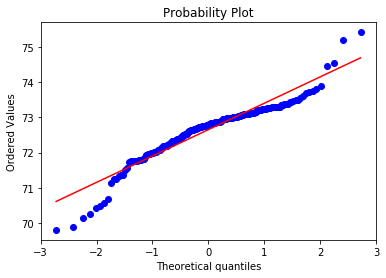

Column 6:


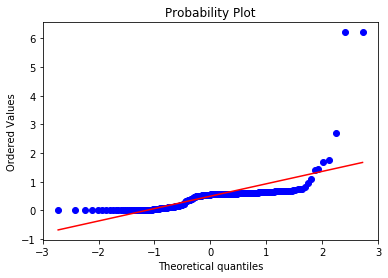

Column 7:


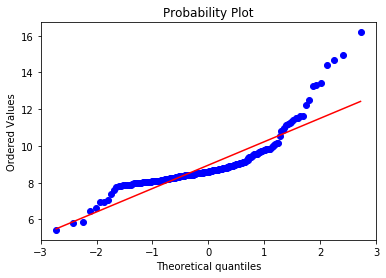

Column 8:


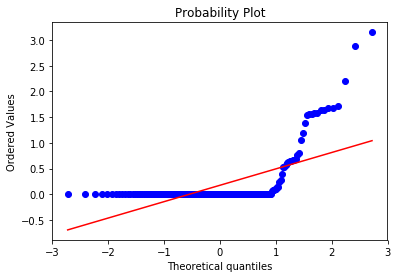

In [5]:
for col in range(len(summary)):
    stats.probplot(glass.iloc[:,col + 1], dist = "norm", plot = plot)
    print("Column " + str(col + 1) + ":")
    plot.show()

### Parallel coordinates plot (unnormalized vs normalized)

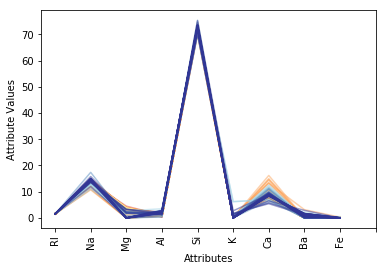

In [6]:
nrows = len(glass.index)
targetCol = len(glass.columns) - 1

meanTarget = summary.iloc[1, targetCol]
sdTarget = summary.iloc[2, targetCol]
nDataCol = len(glass.columns) - 1

for i in range(nrows):
    dataRow = glass.iloc[i, 1:nDataCol]
    labelColor = glassNormalized.iloc[i, targetCol] / 7
    dataRow.plot(color = plot.cm.RdYlBu(labelColor), alpha = 0.5)
    
plot.xlabel("Attributes")
plot.ylabel("Attribute Values")
plot.xticks(list(range(0, len(summary.columns) - 1)), list(summary.columns)[1:-1], rotation = 'vertical')
plot.show()

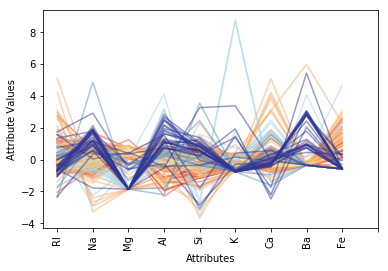

In [7]:
for i in range(nrows):
    dataRow = glassNormalized.iloc[i, 1:nDataCol]
    labelColor = glassNormalized.iloc[i, targetCol] / 7
    dataRow.plot(color = plot.cm.RdYlBu(labelColor), alpha = 0.5)
    
plot.xlabel("Attributes")
plot.ylabel("Attribute Values")
plot.xticks(list(range(0, len(summary.columns) - 1)), list(summary.columns)[1:-1], rotation = 'vertical')
plot.show()

### Correlation heat map

In [8]:
corMat = pd.DataFrame(glass.iloc[:, 1:].corr())
print(corMat)

            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.74

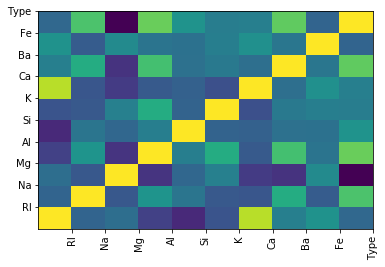

In [9]:
plot.pcolor(corMat)
plot.xticks(list(range(1, len(summary.columns))), list(summary.columns[1:]), rotation = 'vertical')
plot.yticks(list(range(1, len(summary.columns))), list(summary.columns[1:]), rotation = 'horizontal')
plot.show()